In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_excel("Eksamen-2024/Final2024.xlsx", engine = 'openpyxl', skiprows=1) #installere conda install openpyxl i terminalen 

In [112]:
df.head()

,Kandidatnr,1.1 tallsystem,1.2 Sortering,1.3 ASCII hullbånd,1.4 oblig,1.5 hvilken likning,1.6 virker koden,1.7 hva blir printet,1.8 programflyt,2.1,...,3.8,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,Grand Total
0,1,2.4,3.0,1.9,3,3,0,3,3.8,5,...,4.00,3.0,3,3,4,6,1.5,1,2,89.74
1,2,2.1,3.0,2.5,0,3,3,3,1.8,3,...,3.00,1.0,2,3,4,6,1.0,0,2,70.88
2,3,0.9,0.0,0.0,0,0,0,0,0.0,4,...,3.25,4.0,2,0,0,0,1.0,0,1,37.64
3,4,2.4,3.0,1.9,3,3,3,3,1.8,5,...,3.50,2.5,1,3,4,0,0.5,0,0,76.81
4,5,2.4,0.0,0.0,0,0,0,0,1.8,0,...,3.50,1.0,2,0,0,0,0.5,0,2,35.71


In [113]:
df['Grand Total'].count() # getting total count of entries 

np.int64(569)

In [114]:
# Creating bins and labels to divide grand total into grade segements
score_groups = [0, 40, 46, 58, 77, 92, 100]
grade_labels =['F', 'E', 'D', 'C', 'B', 'A'] 

In [115]:
pd.cut(df['Grand Total'], bins = score_groups, labels = grade_labels)

0      B
1      C
2      F
3      C
4      F
      ..
564    C
565    C
566    C
567    C
568    D
Name: Grand Total, Length: 569, dtype: category
Categories (6, object): ['F' < 'E' < 'D' < 'C' < 'B' < 'A']

In [116]:
# create a new column for grades
df['Grade'] = pd.cut(df['Grand Total'], bins = score_groups, labels = grade_labels) 

In [117]:
df['Grade'] # see the new column

0      B
1      C
2      F
3      C
4      F
      ..
564    C
565    C
566    C
567    C
568    D
Name: Grade, Length: 569, dtype: category
Categories (6, object): ['F' < 'E' < 'D' < 'C' < 'B' < 'A']

In [118]:
# counting number of items (students) per grade
df['Grade'].value_counts()

Grade
C    271
B    173
D     76
F     24
E     19
A      6
Name: count, dtype: int64

#### Finding outliers Steps 
1- Clean data from duplicates values and take only unique value that occur once.  

2- sort them in ascending order from min to max value. 

3- Calculate Median

4- Calculate Mean

5-Finding outliers using IQR

In [119]:
#Finding outliers steps 

# Obtain unqiue scores and convert dataframes to list
total_scores= df['Grand Total'].unique().tolist() 

# First step: Sort the list in ascending order and round two digits after decimal point.
total_scores_list = [round(score,2) for score in total_scores]

# Sort in ascending order, remove duplicates using set to find unique values occur only once. 
total_scores_sorted = list(sorted(set(total_scores_list)))

print(f"final_scores_sorted{total_scores_sorted}")

final_scores_sorted[26.3, 28.28, 29.7, 30.24, 30.25, 31.13, 32.56, 32.61, 32.78, 33.82, 34.13, 35.09, 35.23, 35.71, 35.89, 36.01, 37.08, 37.59, 37.64, 37.77, 38.03, 38.22, 38.83, 39.22, 40.12, 40.39, 40.65, 40.75, 40.77, 40.88, 41.13, 41.43, 42.35, 42.5, 43.19, 43.24, 43.85, 43.87, 44.15, 44.24, 45.61, 45.68, 45.8, 46.01, 46.15, 46.52, 46.74, 46.9, 46.97, 47.09, 47.51, 47.52, 47.57, 47.73, 47.75, 48.05, 48.08, 48.1, 48.28, 48.4, 48.43, 48.71, 48.72, 48.73, 48.89, 49.43, 49.63, 49.75, 49.86, 50.11, 50.17, 50.38, 50.51, 50.62, 50.84, 51.07, 51.19, 51.4, 51.62, 51.66, 51.74, 52.48, 52.7, 52.78, 52.85, 52.86, 53.6, 53.67, 53.75, 54.08, 54.42, 54.43, 54.48, 54.49, 54.58, 54.64, 54.93, 55.14, 55.16, 55.25, 55.33, 55.71, 56.15, 56.22, 56.41, 56.58, 56.65, 56.71, 56.73, 56.99, 57.2, 57.31, 57.4, 57.59, 57.67, 57.75, 57.82, 58.01, 58.06, 58.13, 58.18, 58.25, 58.28, 58.57, 58.75, 58.82, 58.86, 58.93, 59.03, 59.12, 59.23, 59.26, 59.38, 59.46, 59.53, 59.65, 59.68, 59.7, 59.75, 59.98, 59.99, 60.0, 

In [120]:
# Second step calculate median

# Count total number of items in our total score list after cleaning
total_items = len(total_scores_sorted)
print(f"total items in the list = {total_items}")

# Given 518 is even number we follow the rule of finding median for even numbers. 
N1_indx = int(total_items/2)
N2_indx = int(total_items/2 + 1)
print(N1_indx, N2_indx)

# calculate our median index
median = round((total_scores_sorted[N1_indx] + total_scores_sorted[N2_indx]) / 2, 2)
print(f"Median = {median}")


print(total_scores_sorted[N1_indx], total_scores_sorted[N2_indx])

# or we could simply use np.median. 
# np.median(total_scores_sorted)

total items in the list = 518
259 260
Median = 70.42
70.41 70.43


In [121]:
# calcaulting the mean (avg) and round it to 2 decimal digits.
mean = round(sum(total_scores_sorted)/total_items, 2) 
print(f"mean = {mean}")

mean = 68.02


Comment: Given that mean < median this indicate our data is left skwed slightly by 2.4 points. 
However giving this slight difference it indicate balance in data.

In [122]:
# finding Q1 and Q3 to boxplot 
Q1 = round(np.percentile(total_scores_sorted,25), 2)
Q3 = round(np.percentile(total_scores_sorted, 75), 2)
print(f"Q1 = {Q1}, Q3 = {Q3}")

# calculate interquartile range IQR
IQR = round(Q3 - Q1, 2)
print(f"IQR = {IQR}")

Q1 = 59.15, Q3 = 78.43
IQR = 19.28


In [123]:
# after finding Q1, Q3 and IQR 
# time to calculate upper fence (max value) and lower fence ( min value) 
lower_fence = round(Q1 - (1.5 * IQR), 2)
upper_fence = round(Q3 + (1.5 * IQR), 2)
print(f"Minimum fence value = {lower_fence} and Maximum fence value = {upper_fence}")

Minimum fence value = 30.23 and Maximum fence value = 107.35


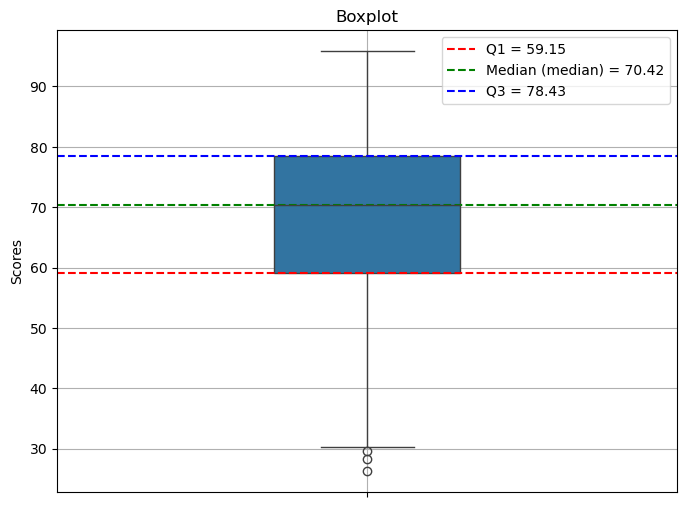

In [124]:
# Creating boxplot
plt.figure(figsize=(8,6))
sns.boxplot(total_scores_sorted, width = 0.3, orient="v")
plt.ylabel("Scores")
plt.title("Boxplot")
plt.grid(True)

# Add annotation lines
plt.axhline(Q1, color='red', linestyle='--', label=f'Q1 = {Q1}')
plt.axhline(median, color='green', linestyle='--', label= f'Median (median) = {median}')
plt.axhline(Q3, color='blue', linestyle='--', label=f'Q3 = {Q3}')

# Print legend
plt.legend()
plt.show()

Comment: 50% of our data is packed between 60-80 indicate balanced performance so majroity of scores cluster around median this indicate balance no extrenme left or right skewness.

### Level 2: Item Analyse 


In [125]:
#sort dataframe by scores in tallsystem to calcualte median
sorted_df = df.sort_values(by = '1.1 tallsystem') 

#calculate mean, median and std for Q1.1
Q1_mean = round(df['1.1 tallsystem'].mean(), 2)
Q1_median = round(sorted_df['1.1 tallsystem'].median(), 2)
Q1_std = round(df['1.1 tallsystem'].std(), 2)

# just testing if i would get the same median if I convert to list and sort. It was the same as sorting dataframe directly by 1.1 tallsystem.
Q1_list = df['1.1 tallsystem'].tolist()
Q1_sorted_list = sorted(Q1_list)
median = np.median(Q1_sorted_list)

print(f"the mean for Question 1.1 tallsystem is: {Q1_mean}")
print(f"the median for Question 1.1 tallsystem is: {Q1_median}")
print(f"the standard deviation for Question 1.1 tallsystem is: {Q1_std}")


the mean for Question 1.1 tallsystem is: 1.89
the median for Question 1.1 tallsystem is: 2.4
the standard deviation for Question 1.1 tallsystem is: 0.62


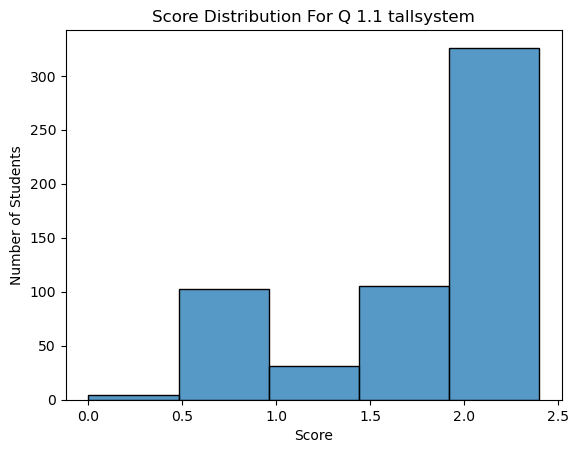

In [126]:
sns.histplot(df['1.1 tallsystem'], bins=5, edgecolor='black')
plt.title('Score Distribution For Q 1.1 tallsystem')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

## Item Difficulty Formula (P) = R/T 
R = number of student who answered correctly  
T = number of student who attempt the question 

In [127]:
T = df['1.1 tallsystem'].count() # total number of students who attempted the question
R = (df['1.1 tallsystem'] == 2.4).sum() # number of students who answer correctly
R1 = Q1_list.count(2.4) # just testing again 
# calculate Item diffculty 
P = round((R / T), 2)
print(f"Item diffculty for Q1 1.1 Tallsystem is {P}")

Item diffculty for Q1 1.1 Tallsystem is 0.51


### Interpretation of item Difficulty 
Easy 80-100%  
Moderately Easy 50-79%  
Moderately Difficult 30-49%  
Difficult 0-29%

Comment: Given the score of item difficutly (P) for question 1.1 tallsystem  is 0.51 it indicates that its moderately easy. 

### Statistics Calculation across all questions

In [128]:
# sorting each columns in the df in ascending order to find the median per each columns. 
df_sorted = df.apply(lambda x: x.sort_values().values)

# getting rid of candidates number columans
#df_numeric = df.drop(columns=['Kandidatnr'])
#df_numeric_sorted = df_sorted.drop(columns=['Kandidatnr'])

# Calculate mean, median, max_scores, min_scores, std
means = round(df.select_dtypes(include='number').mean(), 2)
median =  round(df_sorted.select_dtypes(include='number').median(), 2)
max_scores = round(df.select_dtypes(include='number').max(), 2)
min_scores = round(df.select_dtypes(include='number').min(), 2)
std = round(df.select_dtypes(include = 'number').std(), 2)
kurt = round(df.select_dtypes(include = 'number').kurt(), 2)
df_sorted.head() #sorted !
print(kurt)

Kandidatnr              -1.20
1.1 tallsystem          -0.97
1.2 Sortering           -0.05
1.3 ASCII hullbånd      -1.02
1.4 oblig               -2.00
1.5 hvilken likning     15.52
1.6 virker koden        -1.92
1.7 hva blir printet    -1.12
1.8 programflyt          0.66
2.1                      1.55
2.2                      0.15
2.3                     -0.15
2.4                      0.33
2.5                     -1.07
2.6                      0.00
3.1                      1.46
3.2                      5.24
3.3                      0.47
3.4                      2.81
3.5                      1.26
3.6                      0.93
3.7                     -0.26
3.8                     -0.25
4.1                     -0.45
4.2                     -0.56
4.3                     -1.19
4.4                     -1.01
4.5                     -0.81
4.6                     -0.91
4.7                     -1.82
4.8                     -0.44
Grand Total             -0.11
dtype: float64


In [129]:
stats_df = pd.DataFrame({
    'Mean' : means,
    'Median' : median, 
    'Maximum' : max_scores,
    'Minmum' : min_scores,
    'Standard Deviation' : std,
    'kurtosis' : kurt
}) # keep the questions as columns


# drop first row as it was kandidatnr and last raw grand total
stats_df = stats_df.iloc[1:-1]
stats_df

,Mean,Median,Maximum,Minmum,Standard Deviation,kurtosis
1.1 tallsystem,1.89,2.40,2.4,0.0,0.62,-0.97
1.2 Sortering,2.35,3.00,3.0,0.0,1.19,-0.05
1.3 ASCII hullbånd,0.91,0.00,3.8,0.0,1.10,-1.02
1.4 oblig,1.56,3.00,3.0,0.0,1.50,-2.00
1.5 hvilken likning,2.85,3.00,3.0,0.0,0.65,15.52
1.6 virker koden,1.29,0.00,3.0,0.0,1.49,-1.92
1.7 hva blir printet,2.14,3.00,3.0,0.0,1.36,-1.12
1.8 programflyt,1.67,1.80,3.8,0.0,0.99,0.66
2.1,4.21,5.00,5.0,0.0,1.23,1.55
2.2,3.71,4.00,6.0,0.0,1.27,0.15


In [130]:
# adding section columans 
#stats_df.insert(0, 'Section', 'Section ' + stats_df.index.str[0])
#stats_df

In [131]:
#mapping section to label 

sections = {
    'Section 1' : "Digital representasjon og assemblerkode." ,
    'Section 2' :  "Maskinvare og arkitektur",
    'Section 3' : "Sikkerhet" ,
    'Section 4' : "Datanettverk",
}

# making a copy of original stats_df
stats_df1 = stats_df
#add section column and take take first index of question numbers 
stats_df1['Section'] = 'Section ' + stats_df1.index.str.split('.').str[0]
# add column mapping the label to corrspending section 
stats_df1['Label'] = stats_df1['Section'].map(sections)
stats_df1

,Mean,Median,Maximum,Minmum,Standard Deviation,kurtosis,Section,Label
1.1 tallsystem,1.89,2.40,2.4,0.0,0.62,-0.97,Section 1,Digital representasjon og assemblerkode.
1.2 Sortering,2.35,3.00,3.0,0.0,1.19,-0.05,Section 1,Digital representasjon og assemblerkode.
1.3 ASCII hullbånd,0.91,0.00,3.8,0.0,1.10,-1.02,Section 1,Digital representasjon og assemblerkode.
1.4 oblig,1.56,3.00,3.0,0.0,1.50,-2.00,Section 1,Digital representasjon og assemblerkode.
1.5 hvilken likning,2.85,3.00,3.0,0.0,0.65,15.52,Section 1,Digital representasjon og assemblerkode.
1.6 virker koden,1.29,0.00,3.0,0.0,1.49,-1.92,Section 1,Digital representasjon og assemblerkode.
1.7 hva blir printet,2.14,3.00,3.0,0.0,1.36,-1.12,Section 1,Digital representasjon og assemblerkode.
1.8 programflyt,1.67,1.80,3.8,0.0,0.99,0.66,Section 1,Digital representasjon og assemblerkode.
2.1,4.21,5.00,5.0,0.0,1.23,1.55,Section 2,Maskinvare og arkitektur
2.2,3.71,4.00,6.0,0.0,1.27,0.15,Section 2,Maskinvare og arkitektur


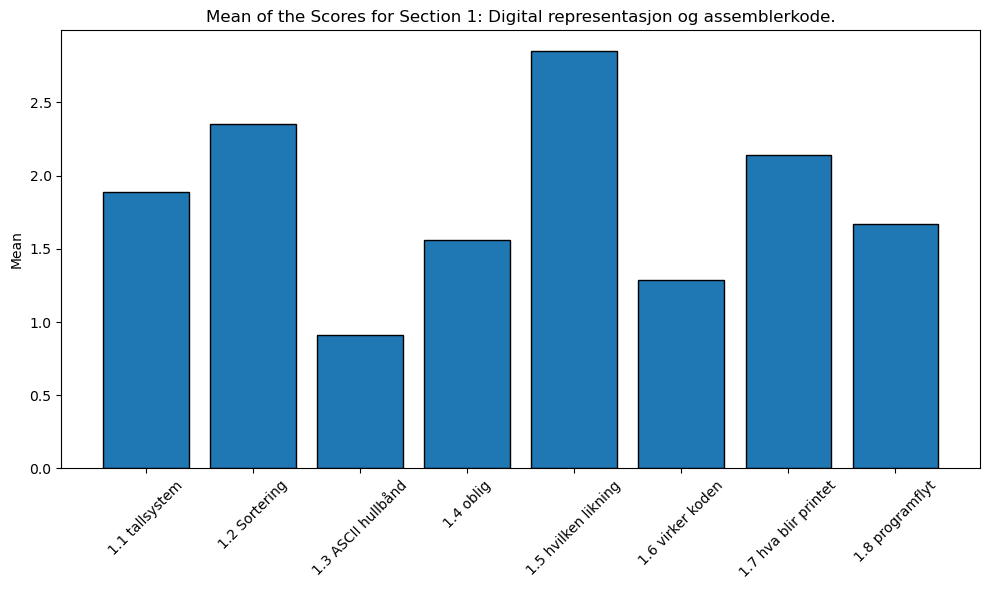

In [132]:
# Data not noramlized here so ignore it.
section1 = stats_df1[stats_df1['Section'] == 'Section 1']

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(section1.index, section1['Mean'], edgecolor='black')  # index is used as x

plt.xticks(ticks=section1.index, labels=section1.index , rotation=45)
plt.ylabel("Mean")
plt.title(f"Mean of the Scores for Section 1: Digital representasjon og assemblerkode.")
plt.tight_layout()
plt.show()

C:\Users\rosem\AppData\Local\Temp\ipykernel_6864\1721327410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  section1.loc[:, 'Normalized Mean (%)'] = (section1['Mean'] / section1['Maximum']) * 100


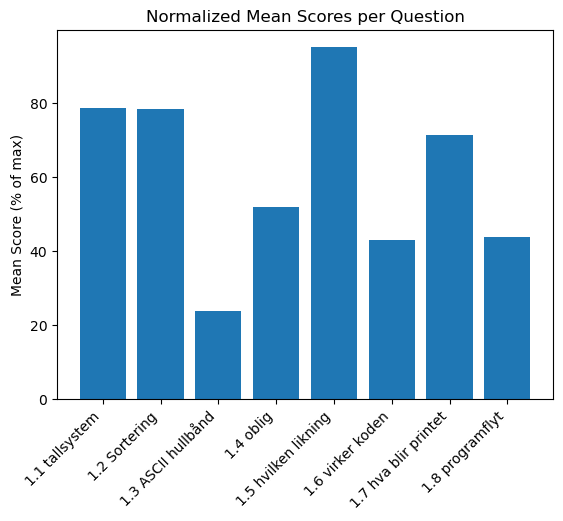

In [133]:
#section1['Normalized Mean (%)'] = (section1['Mean'] / section1['Maximum']) * 100

# adding column to our section1 which is a sliced copy of original stats_df1 dataframe
section1.loc[:, 'Normalized Mean (%)'] = (section1['Mean'] / section1['Maximum']) * 100

plt.bar(section1.index, section1['Normalized Mean (%)'])
plt.ylabel("Mean Score (% of max)")
plt.title("Normalized Mean Scores per Question")
plt.xticks(rotation=45, ha='right')
plt.show()

In [134]:
section1

,Mean,Median,Maximum,Minmum,Standard Deviation,kurtosis,Section,Label,Normalized Mean (%)
1.1 tallsystem,1.89,2.4,2.4,0.0,0.62,-0.97,Section 1,Digital representasjon og assemblerkode.,78.750000
1.2 Sortering,2.35,3.0,3.0,0.0,1.19,-0.05,Section 1,Digital representasjon og assemblerkode.,78.333333
1.3 ASCII hullbånd,0.91,0.0,3.8,0.0,1.10,-1.02,Section 1,Digital representasjon og assemblerkode.,23.947368
1.4 oblig,1.56,3.0,3.0,0.0,1.50,-2.00,Section 1,Digital representasjon og assemblerkode.,52.000000
1.5 hvilken likning,2.85,3.0,3.0,0.0,0.65,15.52,Section 1,Digital representasjon og assemblerkode.,95.000000
1.6 virker koden,1.29,0.0,3.0,0.0,1.49,-1.92,Section 1,Digital representasjon og assemblerkode.,43.000000
1.7 hva blir printet,2.14,3.0,3.0,0.0,1.36,-1.12,Section 1,Digital representasjon og assemblerkode.,71.333333
1.8 programflyt,1.67,1.8,3.8,0.0,0.99,0.66,Section 1,Digital representasjon og assemblerkode.,43.947368


C:\Users\rosem\AppData\Local\Temp\ipykernel_6864\4002114147.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(section1.index, rotation=90)
C:\Users\rosem\AppData\Local\Temp\ipykernel_6864\4002114147.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(section1.index, rotation=90)
C:\Users\rosem\AppData\Local\Temp\ipykernel_6864\4002114147.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(section1.index, rotation=90)


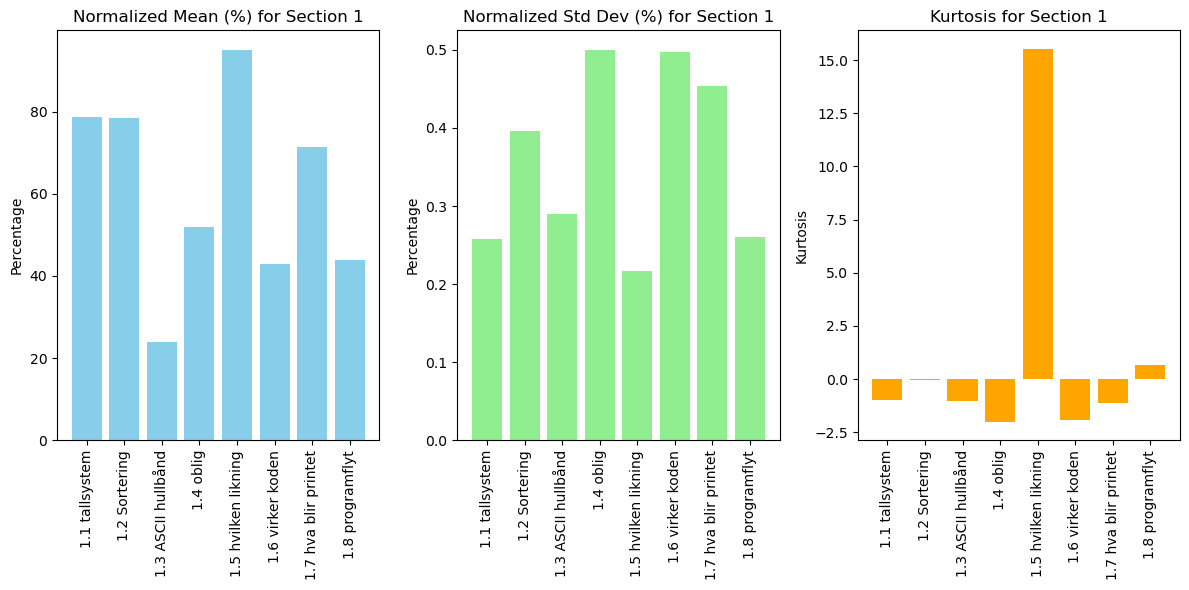

In [144]:
# using .loc for adding column to our section1 which is a sliced copy of original stats_df1 dataframe

# using max-min normalization  for mean
# section1.loc[:, 'Normalized Mean (%)'] = ((section1['Mean'] - section1['Minmum']) / (section1['Maximum'] - section1['Minmum']) )



section1.loc[:, 'Normalized Mean (%)'] = (section1['Mean'] / section1['Maximum']) * 100
# the same just without * 100
#section1.loc[:, 'Normalized Mean (%)'] = (section1['Mean'] / section1['Maximum'])

section1.loc[:, 'Normalized STD (%)'] = (section1['Standard Deviation'] / section1['Maximum']) 
fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 row, 3 columns

# Mean
axes[0].bar(section1.index, section1['Normalized Mean (%)'], color='skyblue')
axes[0].set_title("Normalized Mean (%) for Section 1")
axes[0].set_xticklabels(section1.index, rotation=90)
axes[0].set_ylabel("Percentage")

# Std
axes[1].bar(section1.index, section1['Normalized STD (%)'], color='lightgreen')
axes[1].set_title("Normalized Std Dev (%) for Section 1")
axes[1].set_xticklabels(section1.index, rotation=90)
axes[1].set_ylabel("Percentage")
# Kurtosis (no need to normalize kurtosis — it’s already unitless)
axes[2].bar(section1.index, section1['kurtosis'], color='orange')
axes[2].set_title("Kurtosis for Section 1")
axes[2].set_xticklabels(section1.index, rotation=90)
axes[2].set_ylabel("Kurtosis")

plt.tight_layout()
plt.show()